## **Machine Learning Major Project By Suryaansh Jaiswal** 

***Classification using Logistic Regression***

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

**Reading The Dataset**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv')
data

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [4]:
data.info

<bound method DataFrame.info of       e_magic  e_cblp  e_cp  ...  LoaderFlags  NumberOfRvaAndSizes  class
0       23117     144     3  ...            0                   16      1
1       23117     144     3  ...            0                   16      1
2       23117     144     3  ...            0                   16      0
3       23117     144     3  ...            0                   16      0
4       23117     144     3  ...            0                   16      0
...       ...     ...   ...  ...          ...                  ...    ...
3883    23117     144     3  ...            0                   16      0
3884    23117     144     3  ...            0                   16      0
3885    23117     144     3  ...            0                   16      0
3886    23117     144     3  ...            0                   16      0
3887    23117     144     3  ...            0                   16      0

[3888 rows x 56 columns]>

**Data Visualization and Analysis**

In [5]:
#getting the shape of the dataset
data.shape

(3888, 56)

In [6]:
#getting the name of the columns
data.columns

Index(['e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc',
       'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc',
       'e_ovno', 'e_res', 'e_oemid', 'e_oeminfo', 'e_res2', 'e_lfanew',
       'Machine', 'NumberOfSections', 'CreationYear', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSiz

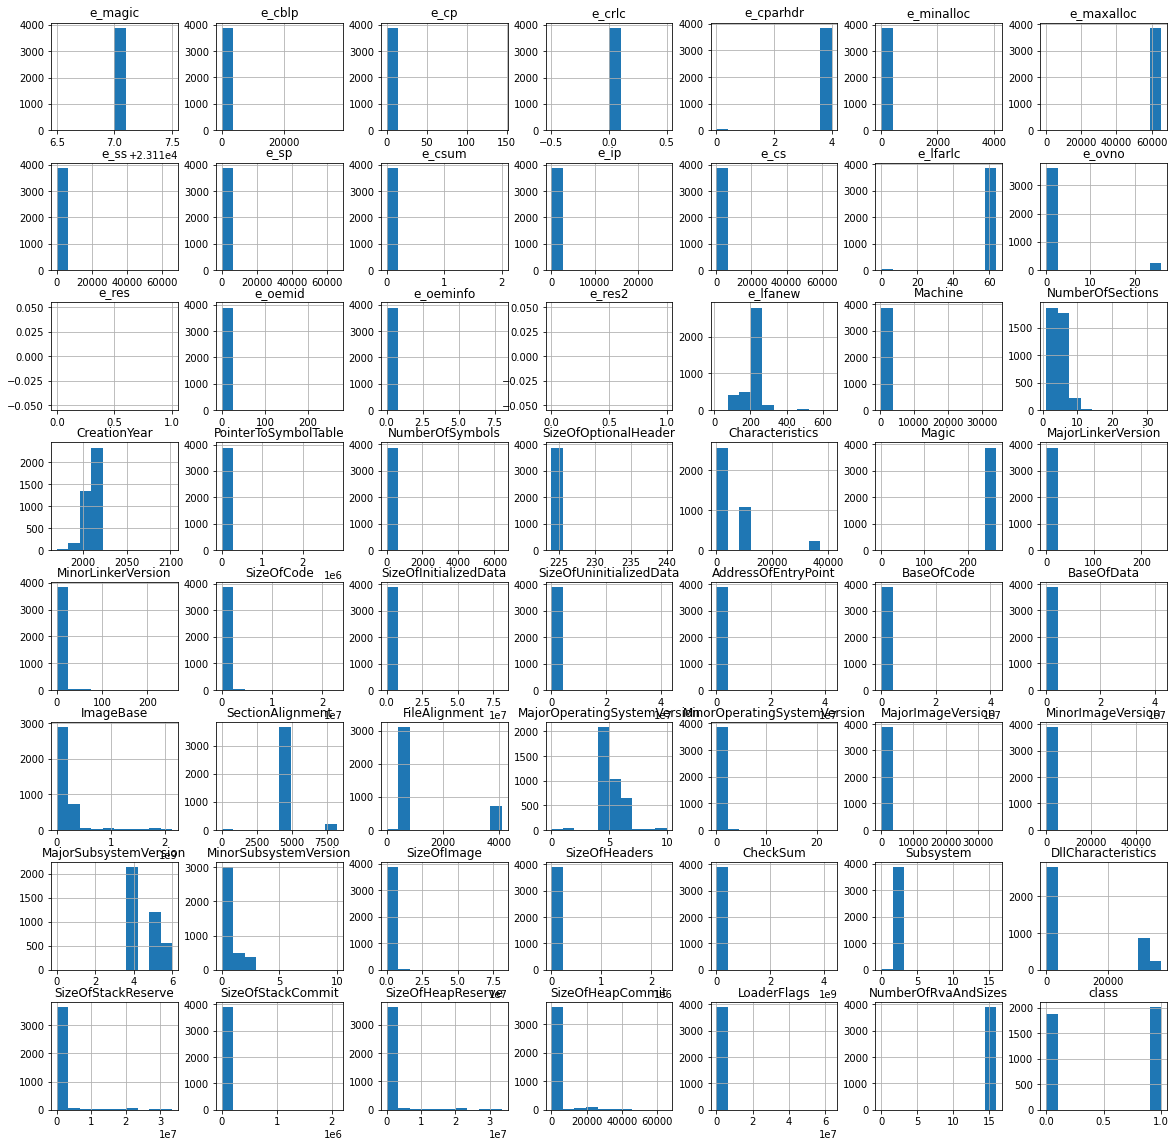

In [7]:
#making a histogram
p = data.hist(figsize = (20,20))

In [8]:
df=data.select_dtypes(include=['float64','int64'])
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [9]:
#finding the number of NULL values
df.isna().sum()

e_magic                           0
e_cblp                            0
e_cp                              0
e_crlc                            0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          3888
e_oemid                           0
e_oeminfo                         0
e_res2                         3888
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion          

In [10]:
df['e_res']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3883   NaN
3884   NaN
3885   NaN
3886   NaN
3887   NaN
Name: e_res, Length: 3888, dtype: float64

In [11]:
df['e_res2']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3883   NaN
3884   NaN
3885   NaN
3886   NaN
3887   NaN
Name: e_res2, Length: 3888, dtype: float64

In [12]:
#dropping the columns that have a NULL value
df = df.drop(['e_res','e_res2'],axis = 1) 
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


**Dividing Into Input and Output**

In [13]:
x=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [14]:
x.shape

(3888, 53)

In [15]:
y.shape

(3888,)

In [16]:
df['class'].value_counts()
#2012- malware
#1876-benign

1    2012
0    1876
Name: class, dtype: int64

In [17]:
#checking for infinite values
d = np.isfinite(df)
display(d)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3884,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3885,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3886,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**Train Test Split**

In [18]:
#splitting train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
#scale is done only gotninput data
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3110, 53)
(778, 53)
(3110,)
(778,)


In [21]:
import numpy as np
np.unique(y_train, return_counts = True) 

(array([0, 1]), array([1511, 1599]))

In [22]:
np.unique(y_test, return_counts = True)

(array([0, 1]), array([365, 413]))

**Using Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model 

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred   #predicted output 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [24]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,

**Accuracy**

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.9125964010282777

*Hence the accuracy from Logistic Regression comes out to be 91.25 %*

In [26]:
np.unique(y_pred,return_counts =True)  

(array([0, 1]), array([359, 419]))

In [27]:
np.unique(y_test, return_counts = True) 

(array([0, 1]), array([365, 413]))

**Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[328,  31],
       [ 37, 382]])

**Classification Report**

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       359
           1       0.92      0.91      0.92       419

    accuracy                           0.91       778
   macro avg       0.91      0.91      0.91       778
weighted avg       0.91      0.91      0.91       778



**F1 score**

In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9182692307692308


*Hence the F1 Score from Logistic Regression comes out to be 0.918*

***Classification using SVC***

**Reading The Dataset**

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv')
data

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


**Data Visualization and Analysis**

In [32]:
df=data.select_dtypes(include=['float64','int64'])
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [33]:
df = df.drop(['e_res','e_res2'],axis = 1) 
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


**Dividing Into Input and Output**

In [34]:
x=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
print(x_train.shape)

(3110, 53)


In [37]:
print(x_test.shape)

(778, 53)


**Using SVC**

In [38]:
from sklearn.svm import SVC

In [39]:
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,

**Accuracy**

In [41]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred,y_test)

0.9125964010282777

*Hence the accuracy from SVC comes out to be 91.25 %*

**Classification Report**

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       359
           1       0.92      0.91      0.92       419

    accuracy                           0.91       778
   macro avg       0.91      0.91      0.91       778
weighted avg       0.91      0.91      0.91       778



**F1 Score**

In [43]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9182692307692308


*Hence the F1 Score from SVC comes out to be 0.918*

***Classification using KNN***

**Reading The Dataset**

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv')
data

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


**Data Visualization and Analysis**

In [45]:
df=data.select_dtypes(include=['float64','int64'])
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [46]:
df = df.drop(['e_res','e_res2'],axis = 1) 
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [47]:
df.size

209952

**Dividing Into Input and Output**

In [48]:
x=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [49]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3110, 53)
(778, 53)
(3110,)
(778,)


**Using KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

In [52]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [53]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [54]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [55]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [56]:
model.score(x,y)*100

94.31584362139918

**Accuracy**

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9344473007712082

*Hence the accuracy from KNN comes out to be 93.44 %*

**Classification Report**

In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       360
           1       0.94      0.93      0.94       418

    accuracy                           0.93       778
   macro avg       0.93      0.93      0.93       778
weighted avg       0.93      0.93      0.93       778



**F1 Score**

In [59]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9386281588447652


*Hence the F1 Score from KNN comes out to be 0.938*

In [60]:
!pip install streamlit

***CREATE AN STREAMLIT WEB APP***

In [61]:
!pip install pyngrok

*Displaying the Highest F1 score*

In [62]:
%%writefile app.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)


def main():
	st.title("The highest F1 score is: ")
	st.subheader("0.938 of KNN classification")


	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("ML Major Project by Suryaansh Jaiswal")	



if __name__ == '__main__':
	main()

Overwriting app.py


In [63]:
!ls

app.py	sample_data


In [64]:
!ngrok authtoken 20w9bK6zxMo5ONfBhDpbxjIQHGZ_3PN2Mkfr3Kx3NStxrNH9s

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [65]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [66]:
from pyngrok import ngrok

In [67]:
!streamlit run app.py &>/dev/null&

In [68]:
!pgrep streamlit

402
552
586
706


In [69]:
publ_url=ngrok.connect(port='8501')

In [70]:
publ_url

<NgrokTunnel: "http://db76-35-229-187-101.ngrok.io" -> "http://localhost:80">

In [71]:
!ngrok http 80

Your account 'Suryaansh Jaiswal' is limited to 1 simultaneous ngrok client session.
Active ngrok client sessions in region 'us':
  - ts_20wC7lnRM3Wu6R4mesywOEiAOsg (35.229.187.101)

ERR_NGROK_108



**The Public URL wont work because of My Firewall installed but The link displays the Highest F1 score Accurately**

***Classification using Naive Bayes***

**Reading The Dataset**

In [73]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/clamp/train_set_label.csv')
data

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [74]:
data.head

<bound method NDFrame.head of       e_magic  e_cblp  e_cp  ...  LoaderFlags  NumberOfRvaAndSizes  class
0       23117     144     3  ...            0                   16      1
1       23117     144     3  ...            0                   16      1
2       23117     144     3  ...            0                   16      0
3       23117     144     3  ...            0                   16      0
4       23117     144     3  ...            0                   16      0
...       ...     ...   ...  ...          ...                  ...    ...
3883    23117     144     3  ...            0                   16      0
3884    23117     144     3  ...            0                   16      0
3885    23117     144     3  ...            0                   16      0
3886    23117     144     3  ...            0                   16      0
3887    23117     144     3  ...            0                   16      0

[3888 rows x 56 columns]>

**Data Visualization and Analysis**

In [75]:
df=data.select_dtypes(include=['float64','int64'])
df

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,7,2011,0,0,224,258,267,9,0,0,98816,0,4816,4096,4096,4194304,4096,512,5,0,0,0,5,0,126976,1024,115397,2,33792,1048576,4096,1048576,4096,0,16,1
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2009,0,0,224,271,267,3,6,29696,81920,0,23426,4096,40960,4194304,4096,512,4,0,0,0,4,0,122880,1536,0,2,0,10485760,40960,6291456,16384,0,16,1
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,5,2003,0,0,224,8462,267,7,10,52224,36352,0,50964,4096,57344,2081554432,4096,512,4,0,0,0,4,0,102400,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,258,267,10,10,77824,67072,0,78808,4096,81920,4194304,4096,512,6,2,6,2,6,0,155648,1024,142244,2,33088,262144,8192,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,192,332,2,2009,0,0,224,8462,267,7,10,0,45056,0,0,4096,4096,268435456,4096,4096,4,0,0,0,4,0,49152,4096,60601,2,1024,1048576,4096,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,200,332,3,2005,0,0,224,3343,267,7,10,31232,6144,0,22898,8192,40960,16777216,8192,512,5,2,5,2,4,0,122880,1024,1169404,2,33792,262144,8192,1048576,4096,0,16,0
3884,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,248,332,5,2012,0,0,224,8450,267,9,0,1052672,769024,0,773964,4096,1056768,268435456,4096,512,5,0,0,0,5,0,1839104,1024,1891705,2,320,1048576,4096,1048576,4096,0,16,0
3885,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,240,332,4,2006,0,0,224,8450,267,8,0,32256,9728,0,9615,4096,40960,4194304,4096,512,4,0,0,0,5,1,53248,1024,64132,2,64,1048576,4096,1048576,4096,0,16,0
3886,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,280,332,6,2010,0,0,224,8462,267,7,10,36864,57344,0,31666,4096,40960,268435456,4096,4096,4,0,0,0,4,0,98304,4096,148009,2,0,1048576,4096,1048576,4096,0,16,0


In [76]:
df = df.drop(['e_res','e_res2'],axis = 1) 
df.head

<bound method NDFrame.head of       e_magic  e_cblp  e_cp  ...  LoaderFlags  NumberOfRvaAndSizes  class
0       23117     144     3  ...            0                   16      1
1       23117     144     3  ...            0                   16      1
2       23117     144     3  ...            0                   16      0
3       23117     144     3  ...            0                   16      0
4       23117     144     3  ...            0                   16      0
...       ...     ...   ...  ...          ...                  ...    ...
3883    23117     144     3  ...            0                   16      0
3884    23117     144     3  ...            0                   16      0
3885    23117     144     3  ...            0                   16      0
3886    23117     144     3  ...            0                   16      0
3887    23117     144     3  ...            0                   16      0

[3888 rows x 54 columns]>

**Dividing Into Input and Output**

In [77]:
x=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

**Train Test Split**

In [78]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Using Naive Bayes**

In [79]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
#BAYES THEOREM 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
y_pred = model.predict(x_test)

In [81]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

**Accuracy**

In [82]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred,y_test)

0.7583547557840618

*Hence the accuracy from Naive Bayes comes out to be 75.83 %*

**Classification Report**

In [83]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.92      0.67       213
           1       0.96      0.70      0.81       565

    accuracy                           0.76       778
   macro avg       0.75      0.81      0.74       778
weighted avg       0.84      0.76      0.77       778



**F1 Score**

In [84]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.8077709611451943


*Hence the F1 Score from Naive Bayes comes out to be 0.8077*

***Hence the Highest F1 Score is given out by KNN CLASSIFICATION***